In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap

Importamos el dataset:

In [3]:
ds_movies = pd.read_csv("movie_metadata.csv")
ds_movies.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
print(ds_movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [5]:
print(', '.join(ds_movies.columns))

color, director_name, num_critic_for_reviews, duration, director_facebook_likes, actor_3_facebook_likes, actor_2_name, actor_1_facebook_likes, gross, genres, actor_1_name, movie_title, num_voted_users, cast_total_facebook_likes, actor_3_name, facenumber_in_poster, plot_keywords, movie_imdb_link, num_user_for_reviews, language, country, content_rating, budget, title_year, actor_2_facebook_likes, imdb_score, aspect_ratio, movie_facebook_likes


In [6]:
pd.set_option('display.max_columns', None)
ds_movies.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [7]:
null_counts = ds_movies.isnull().sum().sort_values(ascending=False)
null_counts[null_counts > 0]

gross                      884
budget                     492
aspect_ratio               329
content_rating             303
plot_keywords              153
title_year                 108
director_name              104
director_facebook_likes    104
num_critic_for_reviews      50
actor_3_name                23
actor_3_facebook_likes      23
num_user_for_reviews        21
color                       19
duration                    15
language                    14
facenumber_in_poster        13
actor_2_name                13
actor_2_facebook_likes      13
actor_1_name                 7
actor_1_facebook_likes       7
country                      5
dtype: int64

In [11]:
#Eliminación de nulos
ds_movies = ds_movies.dropna()
null_counts = ds_movies.isnull().sum().sort_values(ascending=False)
null_counts

color                        0
director_name                0
aspect_ratio                 0
imdb_score                   0
actor_2_facebook_likes       0
title_year                   0
budget                       0
content_rating               0
country                      0
language                     0
num_user_for_reviews         0
movie_imdb_link              0
plot_keywords                0
facenumber_in_poster         0
actor_3_name                 0
cast_total_facebook_likes    0
num_voted_users              0
movie_title                  0
actor_1_name                 0
genres                       0
gross                        0
actor_1_facebook_likes       0
actor_2_name                 0
actor_3_facebook_likes       0
director_facebook_likes      0
duration                     0
num_critic_for_reviews       0
movie_facebook_likes         0
dtype: int64

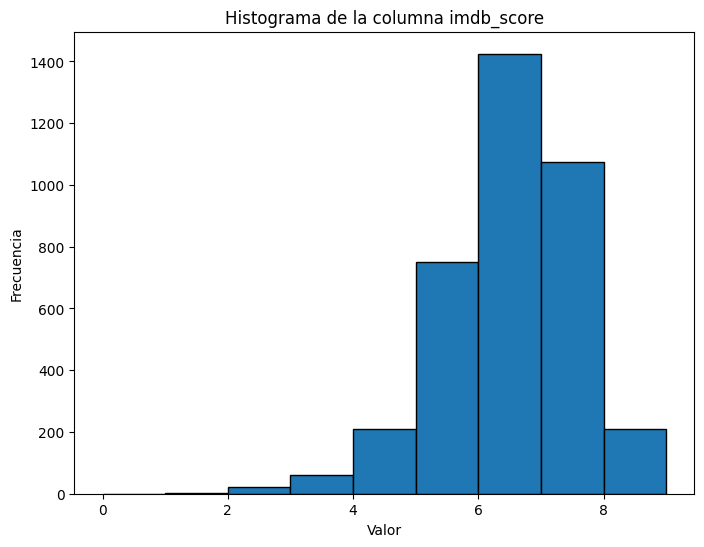

In [12]:
plt.figure(figsize=(8, 6))

plt.hist(ds_movies['imdb_score'], bins=range(0,10), edgecolor='black')

plt.title('Histograma de la columna imdb_score')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

plt.show()

In [13]:
print(ds_movies.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3755 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3755 non-null   object 
 1   director_name              3755 non-null   object 
 2   num_critic_for_reviews     3755 non-null   float64
 3   duration                   3755 non-null   float64
 4   director_facebook_likes    3755 non-null   float64
 5   actor_3_facebook_likes     3755 non-null   float64
 6   actor_2_name               3755 non-null   object 
 7   actor_1_facebook_likes     3755 non-null   float64
 8   gross                      3755 non-null   float64
 9   genres                     3755 non-null   object 
 10  actor_1_name               3755 non-null   object 
 11  movie_title                3755 non-null   object 
 12  num_voted_users            3755 non-null   int64  
 13  cast_total_facebook_likes  3755 non-null   int64  
 1